In [1]:
pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 14.1 MB/s eta 0:00:00


Saving 3.png to 3 (1).png


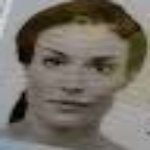

In [6]:
import cv2
from google.colab import files
from mtcnn import MTCNN
from google.colab.patches import cv2_imshow
import os
def detect_and_save_faces(image_path):
    image = cv2.imread(image_path)


    detector = MTCNN()


    faces = detector.detect_faces(image)


    output_folder = "/content/clients"

    os.makedirs(output_folder, exist_ok=True)

    resize_factor = 1.5


    for i, face_data in enumerate(faces):

        x, y, w, h = face_data['box']

        x -= int((resize_factor - 1) * w / 2)
        y -= int((resize_factor - 1) * h / 2)
        w = int(w * resize_factor)
        h = int(h * resize_factor)


        x = max(0, x)
        y = max(0, y)
        w = min(image.shape[1], w)
        h = min(image.shape[0], h)


        face = image[y:y+h, x:x+w]


        photo_size = (150, 150)

        resized_face = cv2.resize(face, photo_size)


        output_path = os.path.join(output_folder, f"client_{i}.png")


        cv2.imwrite(output_path, resized_face)

        cv2_imshow(resized_face)

uploaded = files.upload()

image_path = list(uploaded.keys())[0]

detect_and_save_faces(image_path)


Save model

In [ ]:
import pickle

def save_model(model, filepath):
    with open(filepath, 'wb') as f:
        pickle.dump(model, f)

# Utilisez cette fonction pour enregistrer votre modèle détecteur de visage
# Par exemple, si votre modèle est 'detector'
detector = MTCNN()
save_model(detector, '/content/face_detector_model.pkl')
